In [2]:
import numpy as np
import sys
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import interferometer as itf
from scipy.linalg import expm, logm
sys.path.append('../') # Add parent directory to the system path
from boson_sampling_probabilities import output_probability
from direct_decomposition import random_unitary, direct_decomposition
from simulation import run_interferom_simulation, dist_to_state, state_to_dist
from numeric_truncated_unitaries import numeric_truncated_unitary

In [3]:
# Make a random unitary R to simulate
R = random_unitary(3)
print(R)

[[ 0.31592056+0.32510093j  0.32201732-0.74633321j  0.03010014-0.36453964j]
 [-0.69953531+0.40152137j -0.26652112-0.05642667j -0.34358889-0.39643429j]
 [-0.23001469+0.3017081j  -0.37005099-0.35796141j  0.56409892+0.52228705j]]


In [4]:
initial_dist = [1,0,0]
possible_dists = [[1,0,0], [0,1,0], [0,0,1]] # Every configuration of 1 photon in 3 modes

analytic_probs = dict()
for dist in possible_dists:
    prob = output_probability(initial_dist, dist, R)
    state = dist_to_state(dist)
    analytic_probs[state] = prob

print(analytic_probs)

{'100': 0.20549641073655714, '010': 0.6505690509583426, '001': 0.14393453830510006}


In [5]:
probs_1e3 = run_interferom_simulation(R, initial_dist, 1e3)
probs_1e4 = run_interferom_simulation(R, initial_dist, 1e4)
probs_1e5 = run_interferom_simulation(R, initial_dist, 1e5)

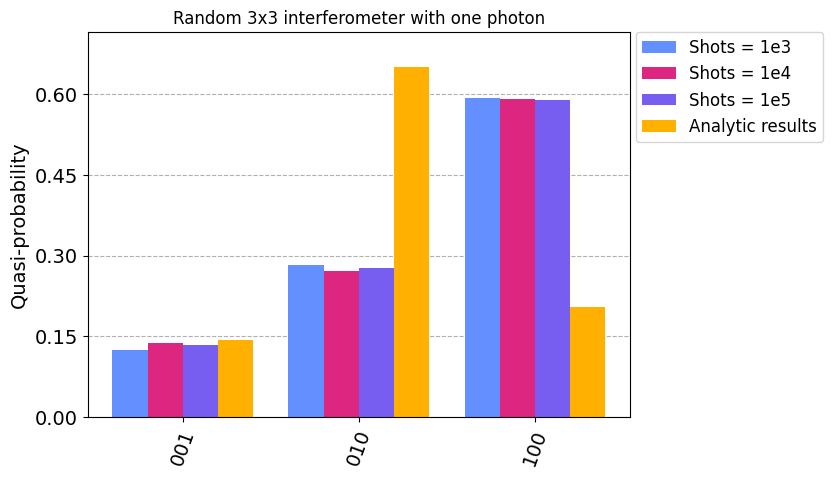

In [6]:
legend = ['Shots = 1e3','Shots = 1e4','Shots = 1e5', 'Analytic results']
plot_histogram([probs_1e3, probs_1e4, probs_1e5, analytic_probs], legend=legend, 
               title='Random 3x3 interferometer with one photon', 
               bar_labels=False)

In [7]:
big_circuit = direct_decomposition(R, 1)

In [8]:
# print(big_circuit)
big_circuit.draw()

global phase: 5.6801
        ┌────────────────────────┐          ┌────────────────────┐        »
q_0: ───┤ U3(π/2,-π/2,-0.088064) ├────■─────┤ U3(2.5065,-π,-π/2) ├─────■──»
     ┌──┴────────────────────────┴─┐┌─┴─┐┌──┴────────────────────┴──┐┌─┴─┐»
q_1: ┤ U3(0.0013233,-π/2,0.029355) ├┤ X ├┤ U3(1.5711,0.93574,-1.57) ├┤ X ├»
     └─────────────────────────────┘└───┘└──────────────────────────┘└───┘»
q_2: ─────────────────────────────────────────────────────────────────────»
                                                                          »
«       ┌────────────────────┐   ░                                    »
«q_0: ──┤ U3(π/2,0.088064,0) ├───░────────────────────────────────────»
«     ┌─┴────────────────────┴─┐ ░    ┌──────────────────────┐        »
«q_1: ┤ U3(1.5721,3.1122,-π/2) ├─░────┤ U3(π/2,-π/2,-1.1617) ├─────■──»
«     └────────────────────────┘ ░ ┌──┴──────────────────────┴──┐┌─┴─┐»
«q_2: ───────────────────────────░─┤ U3(0.0013233,-π/2,0.38723) ├┤ X ├»
«                                ░ └────────────────────────────┘└───┘»
«                                                                ░ »
«q_0: ───────────────────────────────────────────────────────────░─»
«        ┌────────────────────┐          ┌──────────────────┐    ░ »
«q_1: ───┤ U3(2.4477,-π,-π/2) ├────■─────┤ U3(π/2,1.1617,0) ├────░─»
«     ┌──┴────────────────────┴─┐┌─┴─┐┌──┴──────────────────┴──┐ ░ »
«q_2: ┤ U3(1.5711,0.8769,-1.57) ├┤ X ├┤ U3(1.5721,2.7544,-π/2) ├─░─»
«     └─────────────────────────┘└───┘└────────────────────────┘ ░ »
«      ┌─────────────────────┐          ┌────────────────────┐       »
«q_0: ─┤ U3(π/2,π/2,-3.1264) ├────■─────┤ U3(2.5327,-π,-π/2) ├────■──»
«     ┌┴─────────────────────┴─┐┌─┴─┐┌──┴────────────────────┴─┐┌─┴─┐»
«q_1: ┤ U3(3.1403,π/2,-2.0994) ├┤ X ├┤ U3(1.571,0.96192,-1.57) ├┤ X ├»
«     └────────────────────────┘└───┘└─────────────────────────┘└───┘»
«q_2: ───────────────────────────────────────────────────────────────»
«                                                                    »
«       ┌───────────────────┐    ░ 
«q_0: ──┤ U3(π/2,3.1264,-π) ├────░─
«     ┌─┴───────────────────┴──┐ ░ 
«q_1: ┤ U3(1.5695,-1.0421,π/2) ├─░─
«     └────────────────────────┘ ░ 
«q_2: ───────────────────────────░─
«                                ░

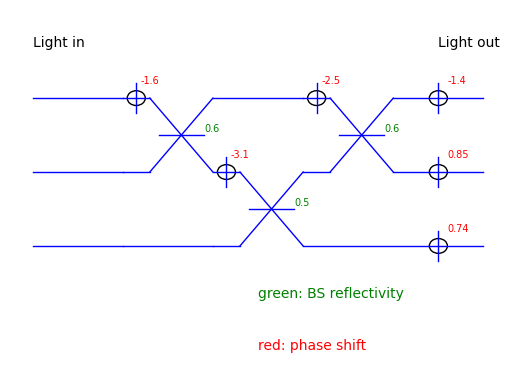

In [9]:
I = itf.square_decomposition(R)
I.draw()

In [10]:
i = itf.Interferometer()
i.add_BS(I.BS_list[0])
r = i.calculate_transformation()
c1 = direct_decomposition(r, 1)
c1.draw()

global phase: 5.0295
        ┌────────────────────────┐          ┌────────────────────┐        »
q_0: ───┤ U3(π/2,-π/2,-0.088064) ├────■─────┤ U3(2.5065,-π,-π/2) ├─────■──»
     ┌──┴────────────────────────┴─┐┌─┴─┐┌──┴────────────────────┴──┐┌─┴─┐»
q_1: ┤ U3(0.0013233,-π/2,0.029355) ├┤ X ├┤ U3(1.5711,0.93574,-1.57) ├┤ X ├»
     └─────────────────────────────┘└───┘└──────────────────────────┘└───┘»
«       ┌────────────────────┐   ░ 
«q_0: ──┤ U3(π/2,0.088064,0) ├───░─
«     ┌─┴────────────────────┴─┐ ░ 
«q_1: ┤ U3(1.5721,3.1122,-π/2) ├─░─
«     └────────────────────────┘ ░

In [11]:
i = itf.Interferometer()
i.add_BS(I.BS_list[1])
r = i.calculate_transformation()
c2 = direct_decomposition(r, 1)
c2.draw()

global phase: 5.0589
      ░                                                                    »
q_0: ─░────────────────────────────────────────────────────────────────────»
      ░    ┌──────────────────────┐           ┌────────────────────┐       »
q_1: ─░────┤ U3(π/2,-π/2,-1.1617) ├─────■─────┤ U3(2.4477,-π,-π/2) ├────■──»
      ░ ┌──┴──────────────────────┴──┐┌─┴─┐┌──┴────────────────────┴─┐┌─┴─┐»
q_2: ─░─┤ U3(0.0013233,-π/2,0.38723) ├┤ X ├┤ U3(1.5711,0.8769,-1.57) ├┤ X ├»
      ░ └────────────────────────────┘└───┘└─────────────────────────┘└───┘»
«                                ░  ░ 
«q_0: ───────────────────────────░──░─
«        ┌──────────────────┐    ░  ░ 
«q_1: ───┤ U3(π/2,1.1617,0) ├────░──░─
«     ┌──┴──────────────────┴──┐ ░  ░ 
«q_2: ┤ U3(1.5721,2.7544,-π/2) ├─░──░─
«     └────────────────────────┘ ░  ░

In [12]:
i = itf.Interferometer()
i.add_BS(I.BS_list[2])
r = i.calculate_transformation()
c2 = direct_decomposition(r, 1)
c2.draw()

global phase: 1.8749
      ┌─────────────────────┐          ┌────────────────────┐       »
q_0: ─┤ U3(π/2,π/2,-3.1264) ├────■─────┤ U3(2.5327,-π,-π/2) ├────■──»
     ┌┴─────────────────────┴─┐┌─┴─┐┌──┴────────────────────┴─┐┌─┴─┐»
q_1: ┤ U3(3.1403,π/2,-2.0994) ├┤ X ├┤ U3(1.571,0.96192,-1.57) ├┤ X ├»
     └────────────────────────┘└───┘└─────────────────────────┘└───┘»
«       ┌───────────────────┐    ░ 
«q_0: ──┤ U3(π/2,3.1264,-π) ├────░─
«     ┌─┴───────────────────┴──┐ ░ 
«q_1: ┤ U3(1.5695,-1.0421,π/2) ├─░─
«     └────────────────────────┘ ░

In [13]:
I.BS_list

[
  Beam splitter between modes 1 and 2: 
  Theta angle: 0.64 
  Phase: -1.69,
 
  Beam splitter between modes 2 and 3: 
  Theta angle: 0.69 
  Phase: -3.12,
 
  Beam splitter between modes 1 and 2: 
  Theta angle: 0.61 
  Phase: -2.60]

In [14]:
u1 = numeric_truncated_unitary(I.BS_list[0].theta, I.BS_list[0].phi, 1)
u2 = numeric_truncated_unitary(I.BS_list[1].theta, I.BS_list[1].phi, 1)
u3 = numeric_truncated_unitary(I.BS_list[2].theta, I.BS_list[2].phi, 1)

u1.shape

(4, 4)